<a href="https://colab.research.google.com/github/Jdelbarcogarza/Analisis-de-estructuras-de-datos-fundamentales/blob/master/Tarea_5_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este análisis se explorará el campo de redes neuronales convolutivas en su parte tanto teórico como práctico. Se Utilizará la librería de Python de  TensorFlow/Keras para el desarrollo de las redes neuronales. Aunado a esto, se reflexionará sobre los resultados obtentenidos en cada uno de los 4 experimentos desarrollados en este trabajo.

# Experimento 1

Modelo de Red Neuronal Convolutiva con la siguiente arquitectura:

* Capa convolutiva de 32 fitros con kernel de 3x3 y activación ReLU.

* Capa de Max pooling con pool de tamaño 2x2

* Capa de aplanamiento

* Capa densa de 128 unidades con activación ReLU

* Capa densa con activación `softmax`

El experimento a realizar será la correcta categorización de imágenes del dataset de CIFAR10. Este conjunto de datos está compuesto por 60000 imágenes 32x32 de divididas en 10 clases, cada clase contando con 6000 imágenes. Entre estas imágenes, se tienen fotos de: aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones. [1] El objetivo de este experimento es entrenar un modelo que pueda, con la arquitectura de red neuronal anterior, conseguir un nivel base de precisión para ir iterando sobre el modelo.

A continuación, utilizando la librería de tensorflow, se creará la arquitectura del modelo y se importa el dataset a utilizar.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# network (hyper-)parameters
hidden_units = 128
dropout = 0.45
batch_size = 128
# compute the number of labels: [0, 1, ..., 9]
num_labels = len(np.unique(y_train))

# convert to one-hot vector: e.g., 2 -> [0, 0, 1, ..., 0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalizar las imágenes de entrada: ajustar los valores de los píxeles de las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Definir la arquitectura del modelo
model = Sequential()

# Convolutional layer with 32 filters, 3×3 kernel size, and ReLU activation.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(dropout))

# MaxPooling layer with 2×2 pool size.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))

# Flatten layer
model.add(Flatten())
model.add(Dropout(dropout))

# Dense layer with 128 units and ReLU activation.
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout))

# --> output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_20 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 flatten_11 (Flatten)        (None, 7200)              0         
                                                                 
 dropout_22 (Dropout)        (None, 7200)              0         
                                                     

Después de haber construido la red neuronal, el resultaod de la función `summary()` no proporciona la siguiente información:

En la columna de Layer, se nos indica qué capa estamos analizando en una fila en específico. En la columna de `Output Shape` se nos muestra las dimensiones de la matriz que sale después de haber pasado por cada capa. En tercera instancia se tienen los parámetros que procesa cada una de las capas. Como podemos ver, en la capa oculta de nuestra arquitectura maneja la mayor cantidad de parámetros.

En el resumen del final, podemos ver que de los `923914` parámeros de nuestra arquitectura, todos son entrenables. Estos mismos parámetros son los que durante el entrenamiento se estarán actualizando para mejorar el poder predictivo del modelo.

Es de valor recordar que en una tipica red neuronal, las conexiones entre neuronas, pesos y el "bias" son componentes que funcionan juntos para calcular un resultado. En el caso de los parámetros no entrenables, estos no se actualizan durante el entrenamiento [2]. Para este modelo no se tiene ningún parámetro no entrenable.

### Función de optimización y pérdida

Seguido de la creación del modelo, se tiene la etapa de optimización y función de pérdida del mismo.

#### Entropía Cruzada
Comenzando con la función de pérdida de entropía cruzada categoríca, o "categorical crossentropy" en inglés. Se utiliza esta función de pérdida debido a que los "labels" de las imágenes están internamente codificados como "one-hot vectors".

Los la codificación de tipo "one-hot" es una estrategia para precisamente codificar información categórica de forma numérica, puesto que los modelos de inteligencia artificial solo comprenden números [3]. La codificación de la información permite hacer una tranformación a los datos para que el valor categorico no se pierda a la vez que este mismo valor es pasado a un "lenguaje" que el modelo entiende.

El objetivo de la "categorical cross-entropy" es encontrar discrepancias entre la distribución de probabilidad predecida y las categogrías o "labels" codificadas como vectores "one-hot", permitiendo diferenciar una clase de objeto de otra [4].

Aplicado al contexto del modelo, con la entropía cruzada categórica se tiene una distribución de probabilidades. Esto se puede representar como una matríz con nueve ceros y un número uno. Esta matriz se traduce a que la probabilida de que un objeto de muestra dado al modelo es 100% probable que tenga un resultado, y es 0% probable que este objeto a la vez uno de los otros nueve elementso posibles. Esto hace sentido ya que el objetivo del modelo es precismante detectar qué tipo de objeto estamos proporcionando de los diez tipos encontrados en el conjunto de datos CIFAR10.


#### Adam
Pasando a la parte de optimización, esta arquitectura del modelo utiliza una función de optimizació llamada "Adam" (Adaptive moment estimation) es una función de gradiente descendente utilizada para actualizar los pesos de la red neuronal convolutiva de forma iterativa [5]. Es decir, todos los parámetros entrenables presentes en nuestro modelo, serán actualizados por esta función de optimización.

Dentro de las ventajas de utilizar la función Adam, se encuentran:
* Facilidad de implementación
* Computacionalmente eficiente
* Funciona bien con problemas que cuentan con muchos parámetros.
* Poca necesidad de memoria

Adam funciona aplicando dos técnicas estocásticas de gradiente descendente. La primera siendo "AdaGrad" (Adaptive gradient Algorithm) y RMSProp (Root Mean Square Propagation). Al juntar estas dos técnicas, La función de Adaptive moment estimation ha probado ser muy buena para este tipo de problemas y es el algoritmo recomendado con redes neuronales convolutivas de acuerdo a especialistas en Stanford [5].


In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)



Epoch 1/20
313/313 [==============================] - 51s 159ms/step - loss: 1.7435 - accuracy: 0.3648 - val_loss: 1.5376 - val_accuracy: 0.4813
Epoch 2/20
313/313 [==============================] - 49s 156ms/step - loss: 1.4879 - accuracy: 0.4656 - val_loss: 1.4492 - val_accuracy: 0.5346
Epoch 3/20
313/313 [==============================] - 50s 160ms/step - loss: 1.4109 - accuracy: 0.4975 - val_loss: 1.3645 - val_accuracy: 0.5599
Epoch 4/20
313/313 [==============================] - 48s 154ms/step - loss: 1.3668 - accuracy: 0.5103 - val_loss: 1.3349 - val_accuracy: 0.5844
Epoch 5/20
313/313 [==============================] - 50s 158ms/step - loss: 1.3272 - accuracy: 0.5259 - val_loss: 1.2967 - val_accuracy: 0.5855
Epoch 6/20
313/313 [==============================] - 48s 154ms/step - loss: 1.2975 - accuracy: 0.5390 - val_loss: 1.2733 - val_accuracy: 0.6003
Epoch 7/20
313/313 [==============================] - 49s 156ms/step - loss: 1.2720 - accuracy: 0.5457 - val_loss: 1.2681 - val_ac

In [ ]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 64.3%


Despés de haber entrenado el modelo anterior con las imágenes del dataset CIFAR10, se tiene una precisión del 64.3% en la correcta categorización de las imágenes con la arquitectura planteada inicialmente.


{'verbose': 1, 'epochs': 20, 'steps': 313}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


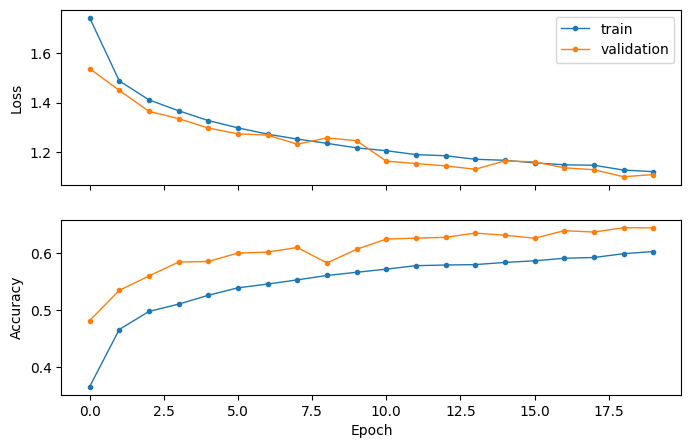

In [ ]:
import matplotlib.pyplot as plt

print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

Tomando en cuenta las gráficas de pérdida y de precisión del modelo que se tiene hasta el momento, podemos obtener las siguientes conclusiones:

La pérdida disminuye constantemente, por lo que podemos interpretar que el modelo efectivamente está aprendiendo conforme pasan las épocas.

Para la parte de precisión, se puede observar que la curva de entrenamiento conforme pasan las épocas se va ajustando a a la curva naranja de validación. Esto es algo muy bueno pues el modelo se hace más precisio conforme pasa el tiempo.

Cabe recalcar que el hecho deque en la función de pérdida exista un ajuste preciso en la gráfica de entrenamiento, esto puede indicar que el modelo no logre un mayor precisión agregando más épocas en futuras iteraciones, por lo que se descartaría esa estrategia de momento. La siguiente estrategia será agregar más capas a la arquitectura del modelo para mejorar la precisión del modelo.

# Experimento 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Permute, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# network (hyper-)parameters
hidden_units = 128
dropout = 0.45
batch_size = 128
# compute the number of labels: [0, 1, ..., 9]
num_labels = len(np.unique(y_train))

# convert to one-hot vector: e.g., 2 -> [0, 0, 1, ..., 0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalizar las imágenes de entrada: ajustar los valores de los píxeles de las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Definir la arquitectura del modelo
model = Sequential()

# Convolutional layer with 20 filters, 3×3 kernel size, and ReLU activation.
model.add(Conv2D(20, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(dropout))

# Permute layer: reordenar las dimensiones del tensor de salida
# Por ejemplo, permutar (batch, height, width, channels) -> (batch, channels, height, width)
model.add(Permute((3, 1, 2)))
model.add(Dropout(dropout))

# MaxPooling layer with 2×2 pool size.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))

# Flatten layer
model.add(Flatten())
model.add(Dropout(dropout))



# Dense layer with 128 units and ReLU activation.
model.add(Dense(hidden_units, activation='relu'))
model.add(BatchNormalization())  # Añadir capa de normalización
model.add(Dropout(dropout))

# Dense layer with 128 units and ReLU activation.
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout))

# --> output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 20)        560       
                                                                 
 dropout (Dropout)           (None, 30, 30, 20)        0         
                                                                 
 permute (Permute)           (None, 20, 30, 30)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 30, 30)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 15, 30)        0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 10, 15, 30)        

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)



Epoch 1/20
313/313 [==============================] - 49s 153ms/step - loss: 2.2714 - accuracy: 0.2083 - val_loss: 1.9987 - val_accuracy: 0.2472
Epoch 2/20
313/313 [==============================] - 50s 159ms/step - loss: 1.8525 - accuracy: 0.3189 - val_loss: 1.8288 - val_accuracy: 0.3392
Epoch 3/20
313/313 [==============================] - 45s 145ms/step - loss: 1.7440 - accuracy: 0.3640 - val_loss: 1.6679 - val_accuracy: 0.4169
Epoch 4/20
313/313 [==============================] - 46s 148ms/step - loss: 1.6709 - accuracy: 0.3916 - val_loss: 1.4917 - val_accuracy: 0.4664
Epoch 5/20
313/313 [==============================] - 49s 155ms/step - loss: 1.6155 - accuracy: 0.4102 - val_loss: 1.5093 - val_accuracy: 0.4462
Epoch 6/20
313/313 [==============================] - 48s 153ms/step - loss: 1.5732 - accuracy: 0.4270 - val_loss: 1.4869 - val_accuracy: 0.4642
Epoch 7/20
313/313 [==============================] - 46s 147ms/step - loss: 1.5559 - accuracy: 0.4308 - val_loss: 1.4594 - val_ac

In [ ]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 25.8%


{'verbose': 1, 'epochs': 20, 'steps': 313}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


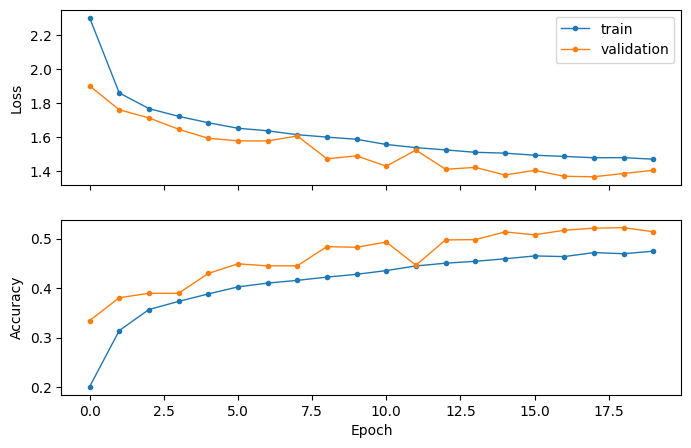

In [ ]:
import matplotlib.pyplot as plt

print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

# Experimento 3

En este experimento, se busca modificar los hiper parámetros del modelo tal como lo es la tasa de aprendizaje, el tamaño de los batches, y el número de épocas con el fin de explorar el impacto que tienen estos parámetros en el modelo. Al final, se reportarán los resultados al modificar estas variables.

#### Qué son los hiperparámetros
Los hiperparámetros son variables que forman parte de la configuración externa de un modelo. Estos son definidos de forma previa al entrenamiento del modelo. Algunos ejemplos de hiperparámetros incluyen el número de nodos y capas en una red neuronal, el número de épicas, el tamaño de los batches de entrenamiento, etc. [6].

Los hiperparámetros afectan componentes relevantes de una red neuronal tales como su arquitectura y el rendimiento del modelo.

#### Modificando hiperparámetros

A continuación, se modifican los hiperparámetros del modelo base presentado en el experimento 1 con el objetivo de comparar cómo cambian los resultados de un mismo modelo al variar los valores del hiperparámetros.

En este modelo se tienen los siguientes hiperparámetros:
* `hidden_units`
* `dropout`
* `batch_size`
* `epochs`
* `validation_split`

Dados estos hiperparámetros, se realizaron las siguientes modificaciones:
para la variable `hidden_units` y `batch_size` se pasó de `128` a `64`. El valor de dropout pasará a `0.30` y la variable `validation_split` se quedará igual. Para las épocas `epochs`, este modelo se entranará ahora con `15` en lugar de `20`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# network (hyper-)parameters
hidden_units = 64
dropout = 0.30
batch_size = 64
# compute the number of labels: [0, 1, ..., 9]
num_labels = len(np.unique(y_train))

# convert to one-hot vector: e.g., 2 -> [0, 0, 1, ..., 0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalizar las imágenes de entrada: ajustar los valores de los píxeles de las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Definir la arquitectura del modelo
model = Sequential()

# Convolutional layer with 32 filters, 3×3 kernel size, and ReLU activation.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(dropout))

# MaxPooling layer with 2×2 pool size.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))

# Flatten layer
model.add(Flatten())
model.add(Dropout(dropout))

# Dense layer with 128 units and ReLU activation.
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout))

# --> output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dropout_2 (Dropout)         (None, 7200)              

Al crear esta arquitectura para el modelo, ya pueden observar algunas diferencias. La más importante es la cantidad total de parámetros que toma el modelo en consideración para generar resultados que identifiquen a las imágenes del dataset CIFAR10. Previamente se tenían `923914` parámetros entrenables. En esta segunda iteración, ahora se cuenta con `462410` parámetros entrenables.

El hecho de que se haya reducido la cantidad de parámetros entrenables tiene varias implicaciones. Primero, un modelo con menos parámetros puede ser menos propenso a sobreajustarse a los datos de entrenamiento, lo que potencialmente mejora su capacidad de generalización en datos no vistos. Segundo, con menos parámetros, el modelo requiere menos memoria y puede ser más rápido tanto en el entrenamiento como en la inferencia.

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
history = model.fit(x_train, y_train, epochs=15, batch_size=batch_size, validation_split=0.2)



Epoch 1/15
625/625 [==============================] - 54s 84ms/step - loss: 1.8084 - accuracy: 0.3381 - val_loss: 1.5280 - val_accuracy: 0.4816
Epoch 2/15
625/625 [==============================] - 52s 83ms/step - loss: 1.5237 - accuracy: 0.4453 - val_loss: 1.4289 - val_accuracy: 0.5263
Epoch 3/15
625/625 [==============================] - 52s 83ms/step - loss: 1.4481 - accuracy: 0.4760 - val_loss: 1.3628 - val_accuracy: 0.5375
Epoch 4/15
625/625 [==============================] - 53s 85ms/step - loss: 1.3895 - accuracy: 0.4952 - val_loss: 1.2922 - val_accuracy: 0.5706
Epoch 5/15
625/625 [==============================] - 53s 85ms/step - loss: 1.3563 - accuracy: 0.5122 - val_loss: 1.2601 - val_accuracy: 0.5864
Epoch 6/15
625/625 [==============================] - 52s 83ms/step - loss: 1.3154 - accuracy: 0.5289 - val_loss: 1.2426 - val_accuracy: 0.5909
Epoch 7/15
625/625 [==============================] - 51s 81ms/step - loss: 1.2964 - accuracy: 0.5321 - val_loss: 1.2237 - val_accuracy:

In [ ]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 60.9%


Después de haber entrenado el modelo con `15` épocas, se puede apreciar por los tiempos de entrenamiento en cada una que el segundo modelo terminó de entrenarse más rápido. El tiempo total de entrenamiento de este modelo fue de `785` segundos, mientras que el primer modelo que contaba con `20` épocas tuvo un tiempo total de entrenamiento de `976` segundos.

Si se compara la precisión del primer modelo `(64.3%)` con el segundo modelo `(60.9%)`, se puede ver que el cambio no es mucho tomando en cuenta la considerable diferencia en cantidad de tiempo de entrenamiento. Esta comparativa muestra la verdadera importancia de una buena configuración de hiperparámetros en el entranamiento de modelos de inteligencia artifical.

Este análisis es un primer acercamiento al entrenamiento de modelos de inteligencia artificial, específicamente redes neuronales convolutivas. Cabe agregar que los datos del conjunto CIFAR10 están limpios, bien estructurados y correctamente etiquetados. Al momento de pasar a consumir datos que se encuentran en el mundo real, por ejemplo datos que genera un negocio, no está garantizado que estos datos estén limpios sin antes pasar por un pipeline de datos, incrementando así el tiempo que toma obtener un modelo listo para hacer inferencias. Pasando al contexto de los negocios, el tiempo es muy importante, y puede que los hiperparámetros correctos hagan toda la diferencia entre un modelo eficiente y otro que no lo sea.

Una diferencia de `194` segundos por una mejora del `4%` en la precisión del modelo es un intercambio que probablemente no sea favorable en un contexto de producción. Más aún cuando el tiempo de entrenamiento en modelos utilizados empresarialmente pueden ser horas o incluso días con modelos más complejos.

{'verbose': 1, 'epochs': 15, 'steps': 625}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


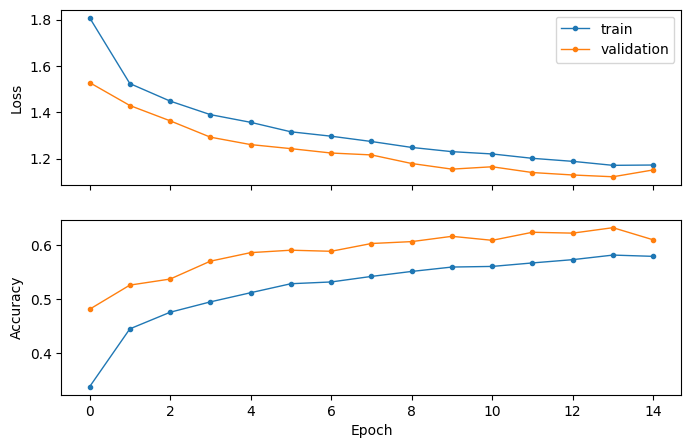

In [ ]:
import matplotlib.pyplot as plt

print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

En la figura anterior se presenta la disminución de la pérdida y el aumento de la precisión del modelo conforme pasan las épocas. A diferencia del modelo anterior, se puede apreciar un comportamiento de ajuste similar al del modelo presentado en el experimento 1.

Nuevamente se puede argumentar que con el aumento de las épocas la precisión del modelo no aumente, lo que permite que en futuras iteraciones del modelo los cambios deban ser en la arquitectura de la red neuronal; específicamente en aumentando capas densas o con capas convolutivas adicionales.

# Experimento 4

En esta cuarta entrega, se comparará el modelo base presentado en el experimento 1 con una nueva iteración del modelo utilizando técnicas más avanzadas con el objetivo de eficientar el rendimiento del modelo base.

En esta arquitectura, se utilizaron las técnicas de Data Augmentation y Batch Normalization.

### Batch normalization
La normalización en machine learning busca estandarizar los datos de entrada con el objetivo de mitigar el impacto que tienen los valores "outliers" en el modelo, mejorar el tiempo de convergencia y en general asegurar una comparativa justa entre caractarísticas del dataset. [7]

Específicamente, la normalización por lotes (batch normalization) es un técnica que normaliza los resultados resultados de la activación en cada capa durante el entrenamiento de un modelo de inteligencia artificial. La normalización es aplicada después de las capas de transformación o las capas convolutivas, y antes de las funciones de activación no lineales, en este caso las funciones ReLU. [8]

Las ventajas de utilizar la normalización por lotes incluyen:
* Estabilizar el proceso de entrenamiento
* Mejora la generalización, reduciendo el sobre-ajustado del modelo.
* Reduce el impacto de los pesos en la inicialización del modelo.
* Disminuye el tiempo de entrenamiento al aumentar la tasa de aprendizaje.

### Data augmentation
El aumento de datos, o data augmentation en inglés, "es un proceso para generar artificialmente nuevos datos a partir de datos existentes [...] para entrenar nuevos modelos de machine learning" (AWS, 2024). Con el aumento de datos se pueden generar nuevas variantes que posiblemente el conjunto de datos original no tiene, ayudando al modelo a que mejore su precisión y evitar que caiga en un sobreajuste.

Dentro de las ventajas de el aumento de datos se encuentran:
* Rendimiento mejorado del modelo para inferencias.
* Reducción de dependencia de los datos.
* Reduce riesgo de sobreajuste en el modelo.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# network (hyper-)parameters
hidden_units = 128
dropout = 0.45
batch_size = 128
# compute the number of labels: [0, 1, ..., 9]
num_labels = len(np.unique(y_train))

# convert to one-hot vector: e.g., 2 -> [0, 0, 1, ..., 0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalizar las imágenes de entrada: ajustar los valores de los píxeles de las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Definir la arquitectura del modelo
model = Sequential()

# Convolutional layer with 32 filters, 3×3 kernel size.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())  # Batch Normalization layer
model.add(Activation('relu'))    # Activation layer
model.add(Dropout(dropout))

# MaxPooling layer with 2×2 pool size.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))

# Flatten layer
model.add(Flatten())
model.add(Dropout(dropout))

# Dense layer with 128 units.
model.add(Dense(hidden_units))
model.add(BatchNormalization())  # Batch Normalization layer
model.add(Activation('relu'))    # Activation layer
model.add(Dropout(dropout))

# --> output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()


170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                       

Después de ejecutar el código con la arquitectura del modelo, se puede observar que hay una mayor número de parámetros entrenables `(924243)` a diferencia del modelo base que tiene `(923914)` parámetros entrenables.

Este incremento se debe en su mayoría a que la normalización en lotes agrega el parámetro de escala (γ) y el parámetro de cambio (β) a cada característica del modelo.

In [4]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)



Epoch 1/20
313/313 [==============================] - 65s 201ms/step - loss: 1.7316 - accuracy: 0.3921 - val_loss: 3.2405 - val_accuracy: 0.1118
Epoch 2/20
313/313 [==============================] - 62s 199ms/step - loss: 1.4365 - accuracy: 0.4805 - val_loss: 1.6975 - val_accuracy: 0.4311
Epoch 3/20
313/313 [==============================] - 64s 206ms/step - loss: 1.3610 - accuracy: 0.5128 - val_loss: 1.6038 - val_accuracy: 0.4632
Epoch 4/20
313/313 [==============================] - 62s 198ms/step - loss: 1.3149 - accuracy: 0.5299 - val_loss: 1.3029 - val_accuracy: 0.5532
Epoch 5/20
313/313 [==============================] - 62s 199ms/step - loss: 1.2796 - accuracy: 0.5413 - val_loss: 1.2283 - val_accuracy: 0.5716
Epoch 6/20
313/313 [==============================] - 61s 193ms/step - loss: 1.2469 - accuracy: 0.5558 - val_loss: 1.2307 - val_accuracy: 0.5869
Epoch 7/20
313/313 [==============================] - 63s 203ms/step - loss: 1.2213 - accuracy: 0.5662 - val_loss: 1.2828 - val_ac

In [5]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 63.2%


Después del entrenamiento con los mismos hiperparámetros que el modelo base, pero con la arquitectura del modelo nueva, se tiene una precisión del `63.4%`. hubo un ligero decremento en la precisión del modelo, pues el modelo base tiene una precisión de `64.3%`.

{'verbose': 1, 'epochs': 20, 'steps': 313}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


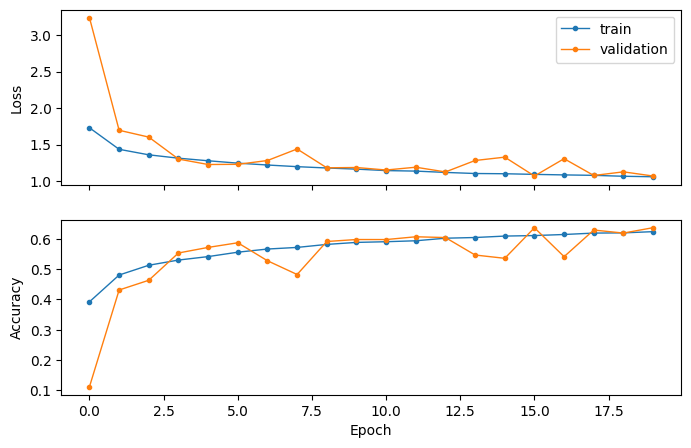

In [6]:
import matplotlib.pyplot as plt

print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

En esta gráfica se presenta la pérdida en ambos conjuntos (entrenamiento y validación) disminuye rápidamente en las primeras pocas épocas, lo que indica que el modelo está aprendiendo y ajustándose a los datos.

Después de aproximadamente 5 épocas, tanto la pérdida como la precisión se estabilizan, dando a entender que el modelo ha alcanzado un punto de equilibrio donde no está mejorando significativamente a diferencia de las épocas 1 a 5.

Pasando a la pérdida y la precisión. Ambos conjuntos de validación se comportan de manera similar a las del conjunto de entrenamiento, no hay señales de un sobreajuste. Las ligeras fluctuaciones en la precisión indican que el modelo va aprendiendo, y parece ser un comporatamiento normal, puesto que las busquedad de las flucutuaciones disminuye conforme van pasando las épocas.


# Referencias

[1] Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.
<br>
[2] Budu, E. (2023, 18 junio). What’s a non-trainable parameter. Baeldung. Recuperado 24 de mayo de 2024, de https://www.baeldung.com/cs/non-trainable-parameter
<br>
[3] Brownlee, J. (2020, 30 junio). Why One-Hot encode data in machine Learning. Machine Learning Mastery. Recuperado 24 de mayo de 2024, de https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
<br>
[4] W&B. (2024, 24 mayo). Weights & biases. W&B. https://wandb.ai/mostafaibrahim17/ml-articles/reports/Understanding-the-Difference-in-Performance-Between-Binary-Cross-Entropy-and-Categorical-Cross-Entropy--Vmlldzo0Nzk4NDI2#:~:text=Categorical%20Cross%2DEntropy%3A%20Use%20Cases%20in%20Neural%20Network,-Categorical%20cross%2Dentropy&text=In%20image%20classification%2C%20it%20helps,accurate%20text%20classification%20or%20generation.
<br>
[5] Gentle Introduction to the Adam Optimization Algorithm for Deep Learning. (2021, 13 enero). Machine Learning Mastery. Recuperado 24 de mayo de 2024, de https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
<br>
[6] What is Hyperparameter Tuning? - Hyperparameter Tuning Methods Explained - AWS. (s. f.). Amazon Web Services, Inc. https://aws.amazon.com/what-is/hyperparameter-tuning/#:~:text=computationally%20intensive%20process.-,What%20are%20hyperparameters%3F,set%20before%20training%20a%20model.
<br>
[7] Kumar, R. (2024, mayo). Batch Normalization: Theory and TensorFlow Implementation. Datacamp. Recuperado 29 de mayo de 2024, de https://www.datacamp.com/tutorial/batch-normalization-tensorflow
<br>
[8] What is Batch Normalization | Deepchecks. (2022, 25 diciembre). Deepchecks. https://deepchecks.com/glossary/batch-normalization/